Seaborn is a library that builds on top of matplotlib.
- Intregrated with pandas
- High level interface to plot data
- less code than matplotlib to make awesome charts


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

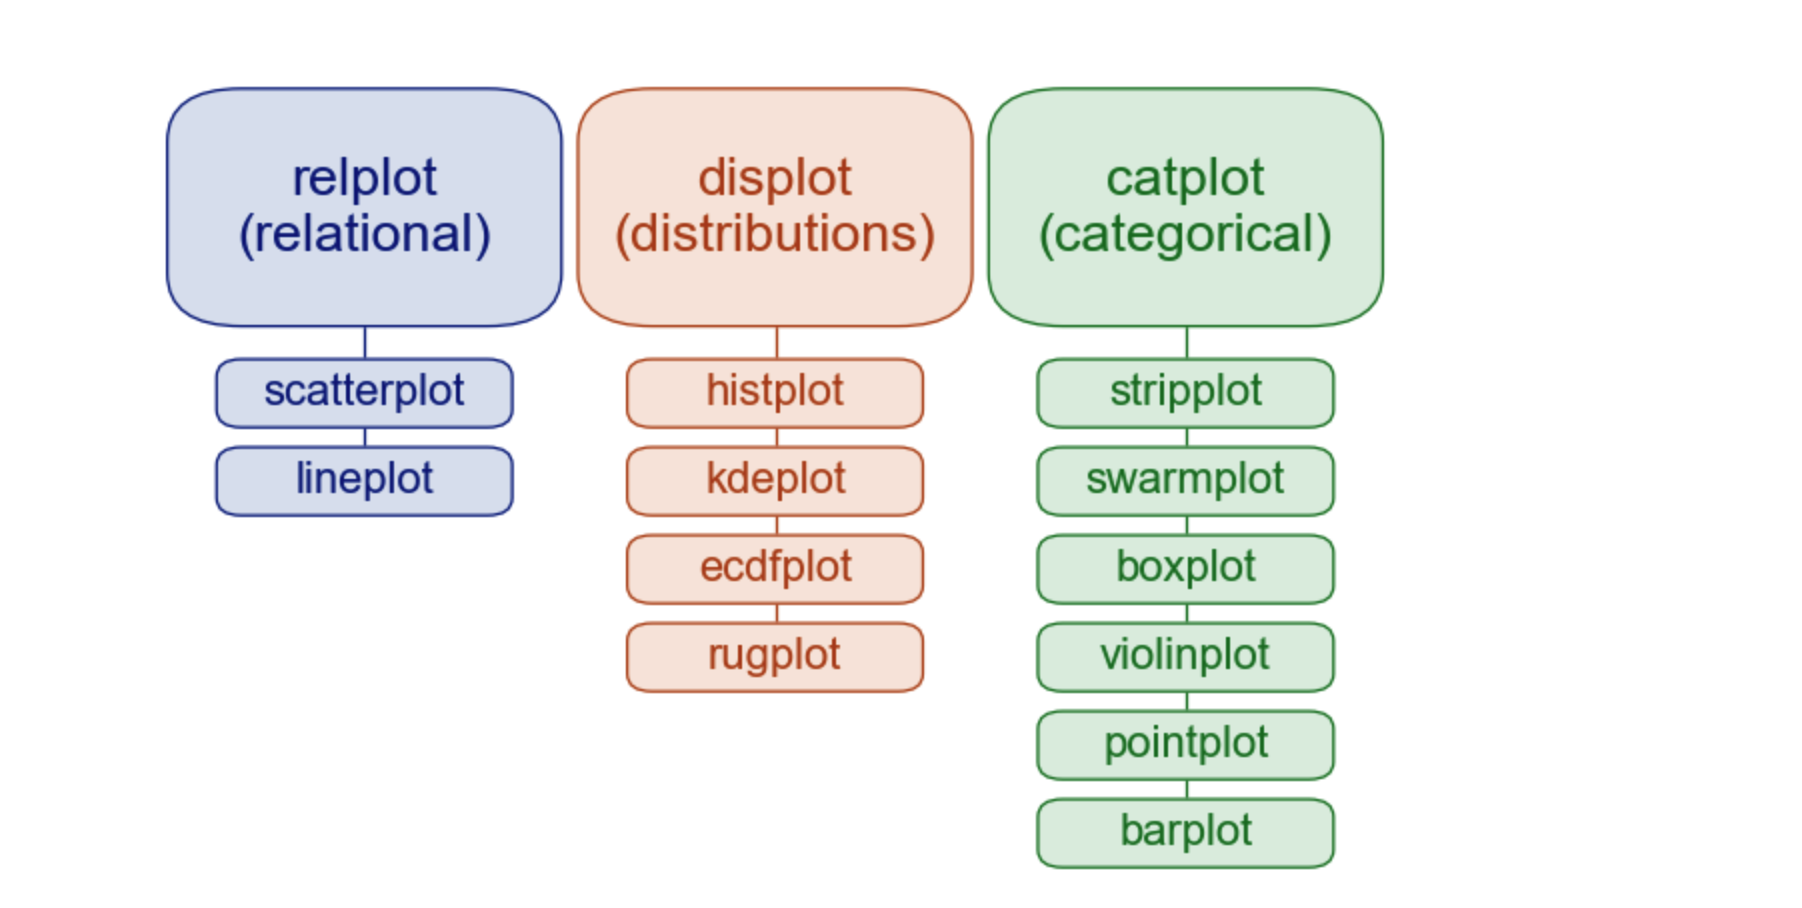

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [3]:
# look for all datasets available in seaborn

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [4]:
# Option 1 : Load directly from sns dataset
tips = sns.load_dataset('tips')

In [5]:
# Option 2: Load using pydataset
tips = data('tips')

In [6]:
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


#### Types of data:

- Continuous Data:- Numeric data with possibly infinite resolution
    - Height
    - Weight
    - total_bill and tip
    - temperature
- Categorical - Distinct categories
    - weekdays
    - Gender
    - 'smoker'
    - letter grades (A, B, C..)

- Discrete - Distinct numeric categories 
     - party_size - numeric but discete
     - number of customer complaints
     - number of flaws or defects.

### Relational Plots 

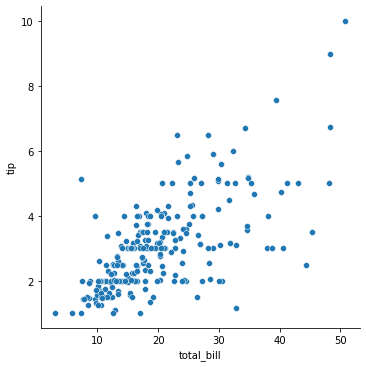

In [9]:
# Explore relationship between total_bill and tip

sns.relplot(data = tips, x = 'total_bill', y = 'tip')

# returns a FacetGrid (which means a figure level object)

Text(0.5, 1.0, 'Total Bil vs Tip Amount')

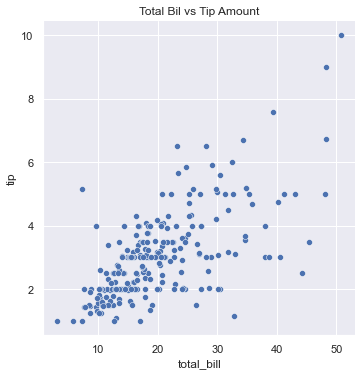

In [11]:
#plt.style.use
sns.set()

sns.relplot(data = tips, x = 'total_bill', y = 'tip')
plt.title("Total Bil vs Tip Amount")

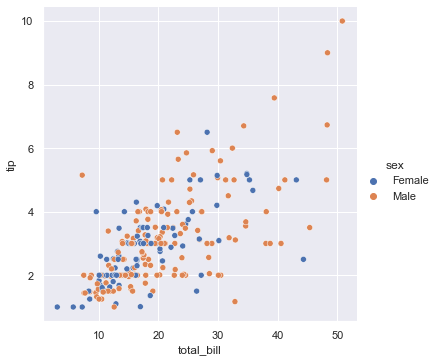

In [13]:
#visualize if dist is diff for smoker vs non-smoker
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue='sex')

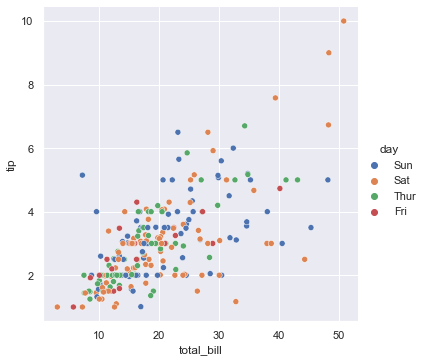

In [15]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue='day')
#use hue with 2-3 max, or else it's TOO MESSY

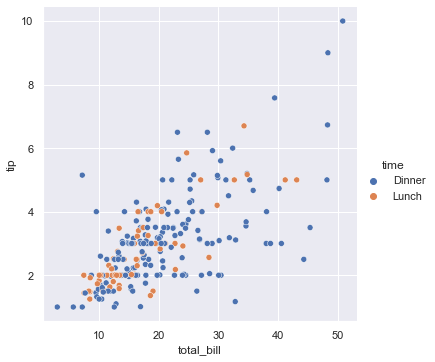

In [17]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue='time')

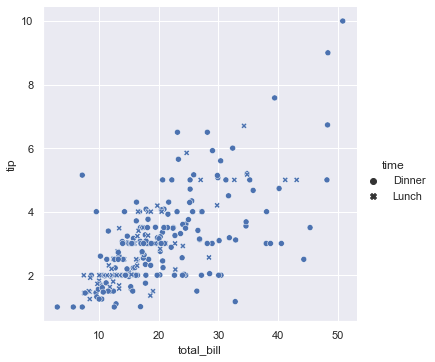

In [18]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', style='time')

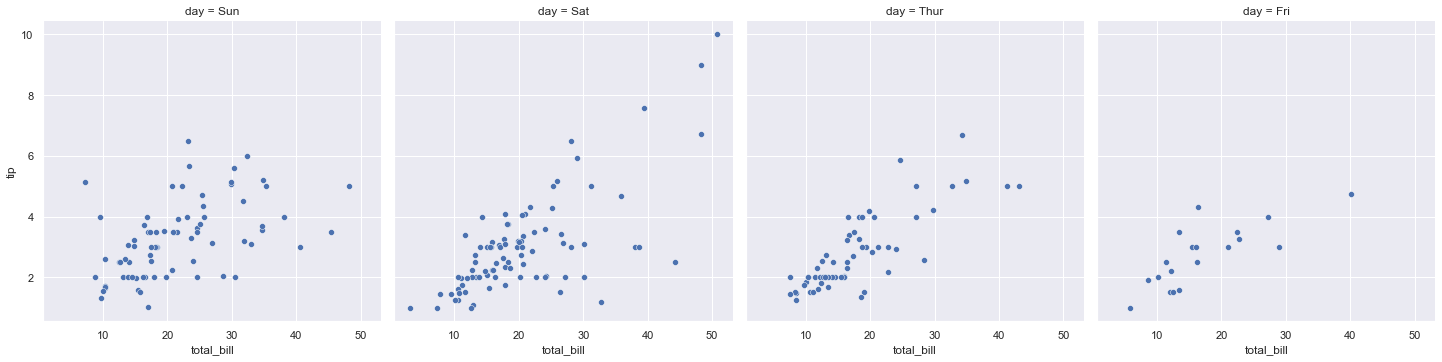

In [19]:
#use arguement called column: 'col'
sns.relplot(data = tips, x = 'total_bill', y = 'tip', col='day')

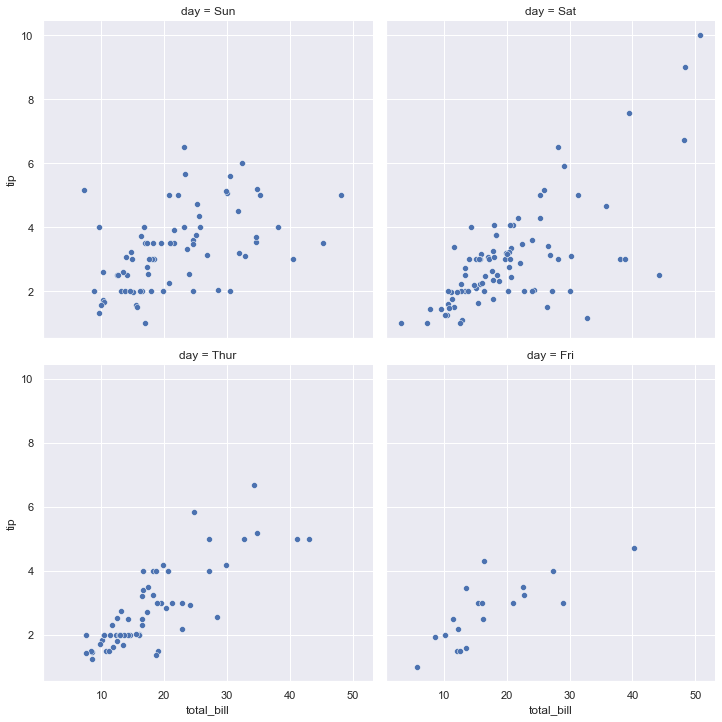

In [21]:
#'col_wrap' to specify number of columns
sns.relplot(data = tips, 
            x = 'total_bill', 
            y = 'tip', 
            col='day', 
           col_wrap =2)

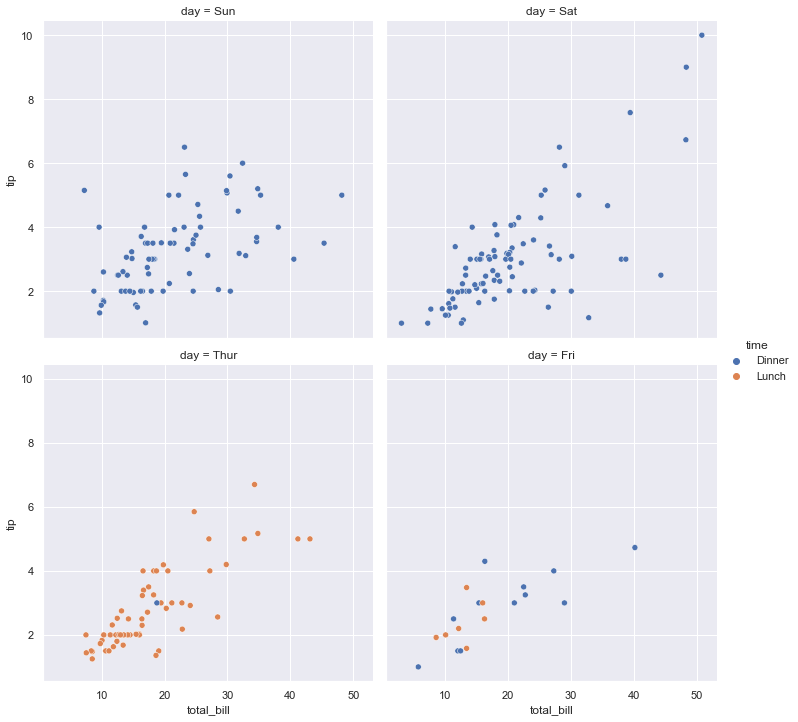

In [22]:
sns.relplot(data = tips, 
            x = 'total_bill', 
            y = 'tip', 
            col='day', 
           col_wrap =2, 
           hue='time')

#### Key takeaways?

#### Ways to add DF columns to the chart
- hue
- col - creates subplots
- style


#### Regression plots

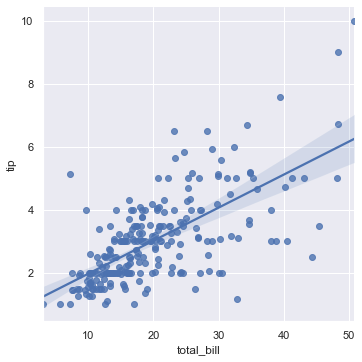

In [23]:
# Add Regression line to relplot: linear model

sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

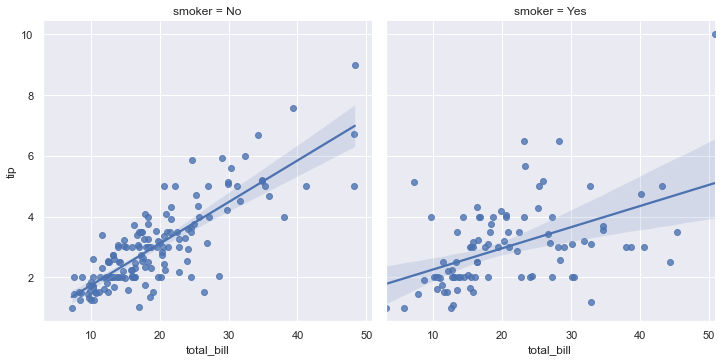

In [24]:
sns.lmplot(x = 'total_bill', y = 'tip', col = 'smoker', data = tips)

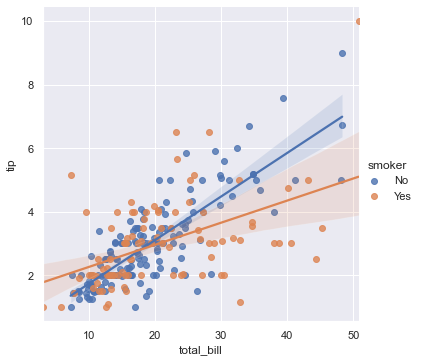

In [25]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips)
#confidence interval autos to 95%

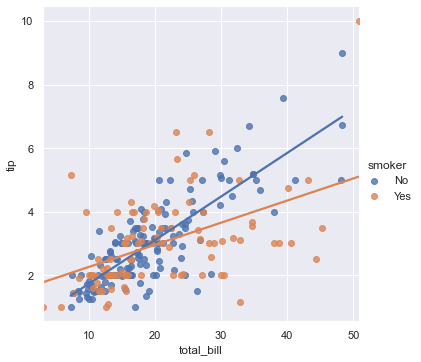

In [27]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, ci = 0)

### Distributions

In [ ]:
# displot/histplot/kdeplot

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

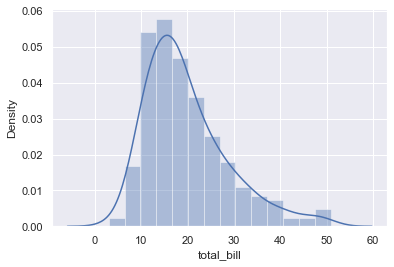

In [28]:
sns.distplot(tips.total_bill)

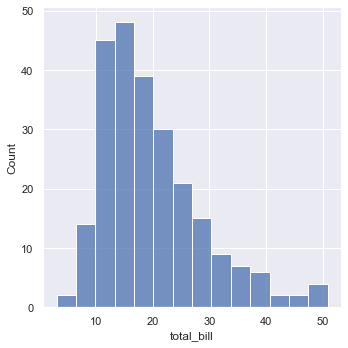

In [29]:
sns.displot(tips.total_bill)

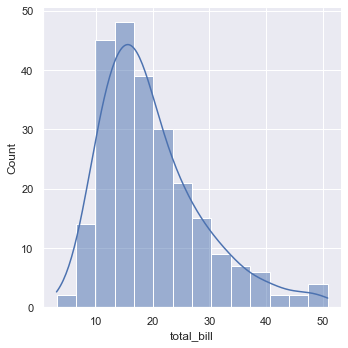

In [30]:
sns.displot(tips.total_bill, kde = True)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

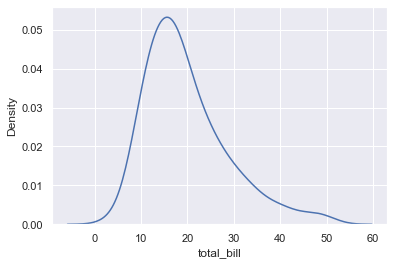

In [31]:
sns.kdeplot(tips.total_bill)

### Categorial Plots

#### Boxplots

<AxesSubplot:ylabel='tip'>

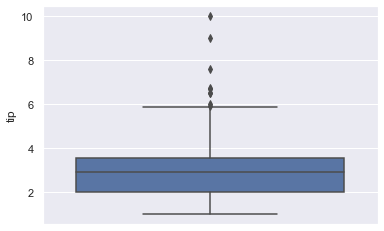

In [32]:
sns.boxplot(data = tips, y = 'tip')

<AxesSubplot:xlabel='tip'>

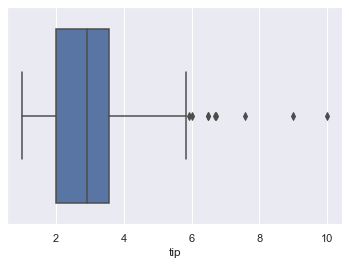

In [33]:
sns.boxplot(data = tips, x = 'tip')

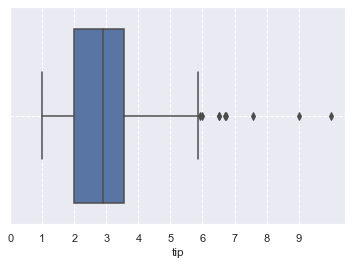

In [35]:
sns.boxplot(data = tips, x = 'tip')
plt.grid(True, ls = '--')
plt.xticks(np.arange(0, 10, 1));

In [36]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<AxesSubplot:xlabel='tip', ylabel='time'>

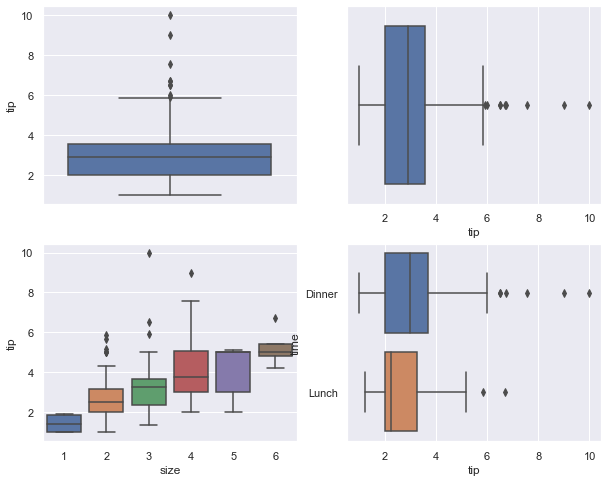

In [43]:
plt.figure(figsize = (10,8))

plt.subplot(221)
sns.boxplot(y = 'tip', data = tips)

plt.subplot(222)
sns.boxplot(x = 'tip', data = tips)

plt.subplot(223)
sns.boxplot(y = 'tip', x = 'size', data = tips)

plt.subplot(224)
sns.boxplot(x = 'tip', data = tips, y = 'time')



<AxesSubplot:xlabel='tip', ylabel='time'>

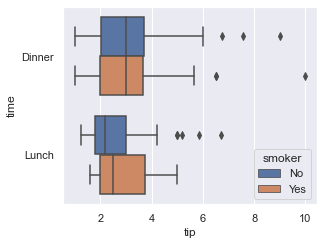

In [44]:
plt.figure(figsize = (10,8))

plt.subplot(221)
sns.boxplot(x = 'tip', data = tips, y = 'time', hue = 'smoker')

plt.subplot(221)
sns.boxplot(x = 'tip', data = tips, y = 'time', hue = 'smoker', order = )

#### Heatmap

In [46]:
data = pd.crosstab(tips.time, tips['size'])
data

size,1,2,3,4,5,6
time,,,,,,
Dinner,2,104,33,32,4,1
Lunch,2,52,5,5,1,3


<AxesSubplot:xlabel='size', ylabel='time'>

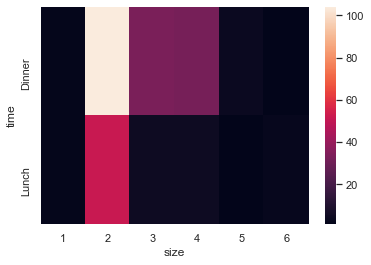

In [47]:
sns.heatmap(data)

<AxesSubplot:xlabel='size', ylabel='time'>

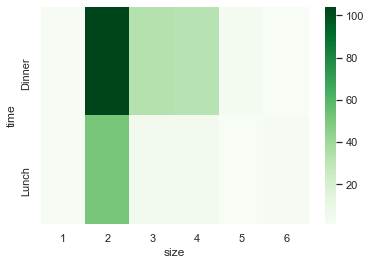

In [48]:
sns.heatmap(data, cmap = plt.cm.Greens)

<AxesSubplot:xlabel='size', ylabel='time'>

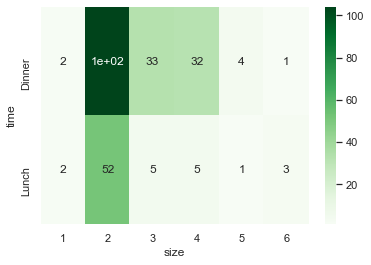

In [49]:
sns.heatmap(data, cmap = plt.cm.Greens, annot=True)

<AxesSubplot:xlabel='size', ylabel='time'>

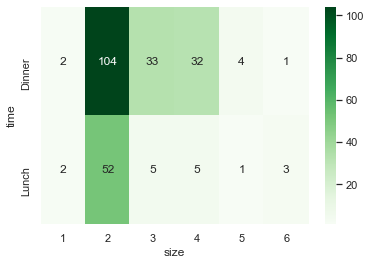

In [50]:
sns.heatmap(data, cmap = plt.cm.Greens, annot=True, fmt = 'd')

In [51]:
data1 = pd.crosstab(tips.time, tips.smoker)
data1

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


<AxesSubplot:xlabel='smoker', ylabel='time'>

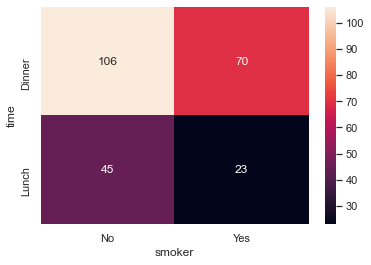

In [53]:
sns.heatmap(data1, annot = True, fmt = 'd')

#### Pairplot

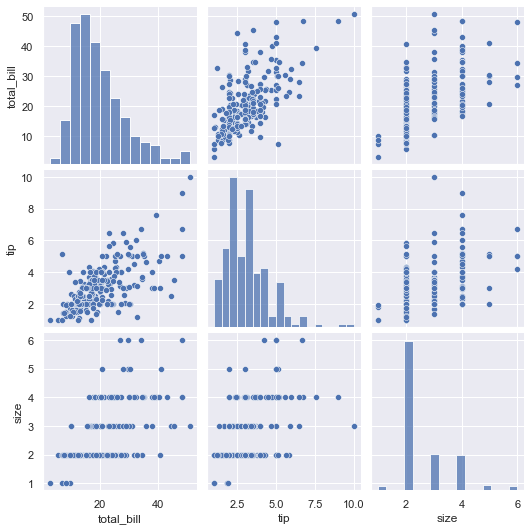

In [54]:
sns.pairplot(tips)

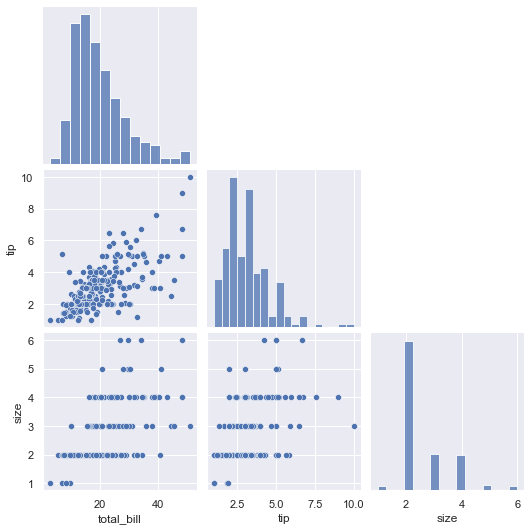

In [55]:
sns.pairplot(tips, corner = 2)

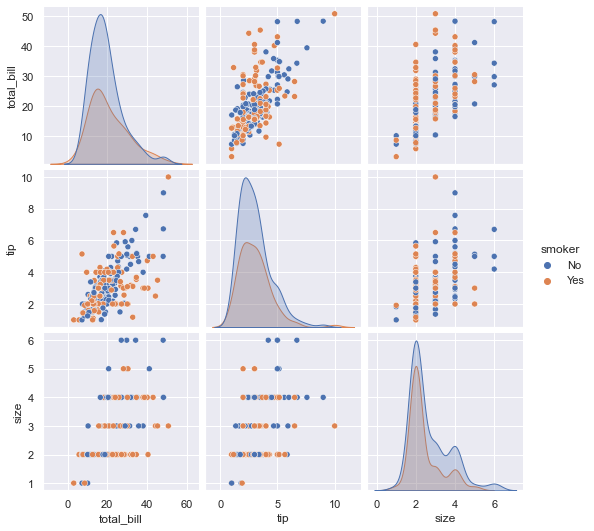

In [56]:
sns.pairplot(tips, hue = 'smoker')

#### Jointpplot

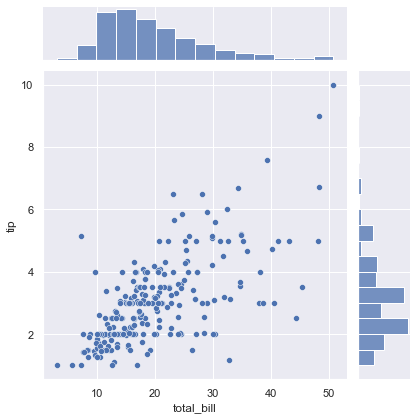

In [58]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip')

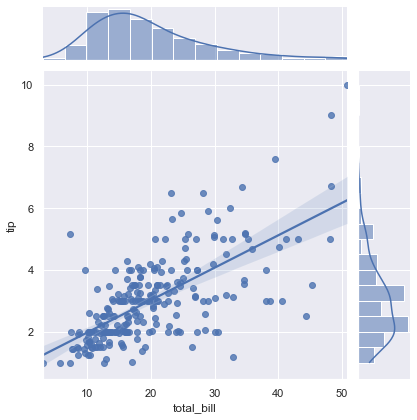

In [59]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

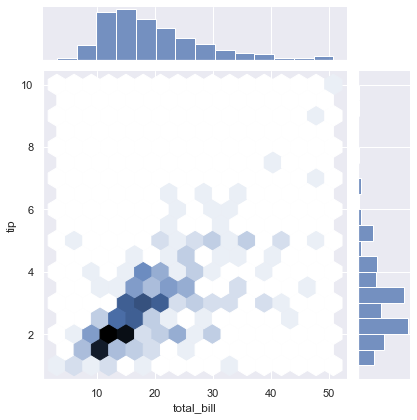

In [60]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex')

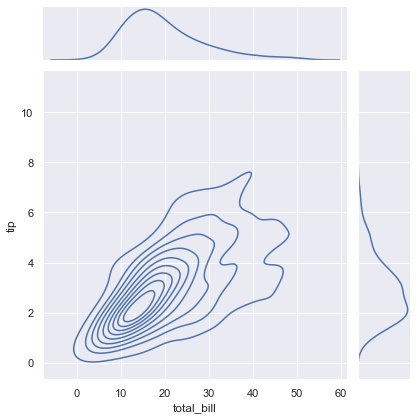

In [61]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde')

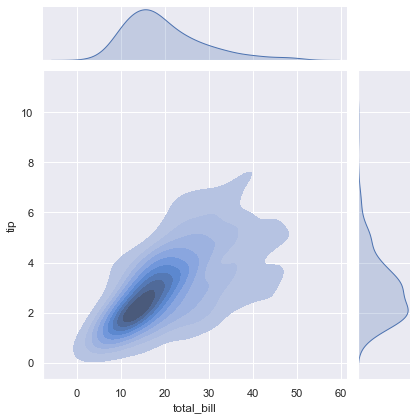

In [62]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde', fill = True)

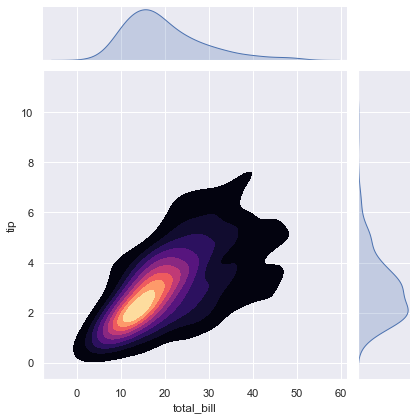

In [65]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde', cmap = 'magma', fill = True)

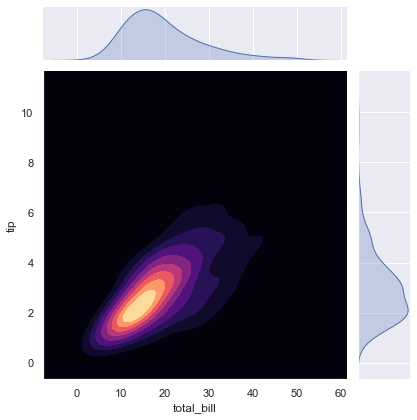

In [66]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde', cmap = 'magma', fill = True, thresh = 0)

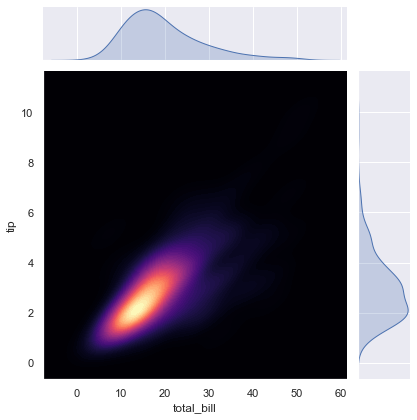

In [67]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde', cmap = 'magma', fill = True, thresh = 0, levels = 60)